In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


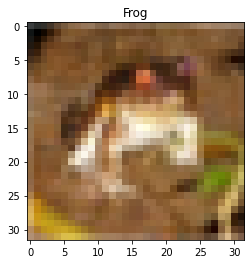

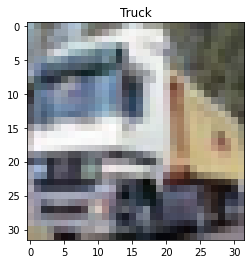

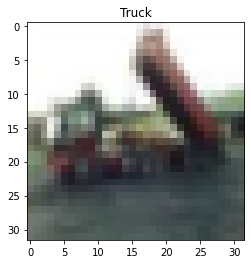

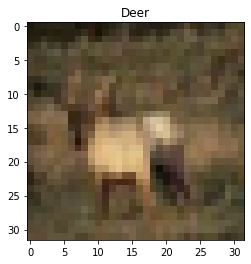

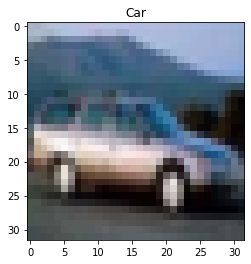

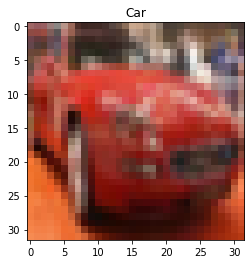

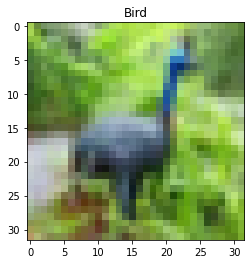

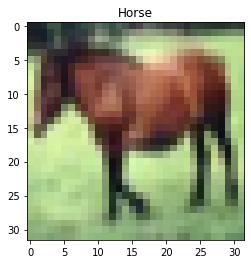

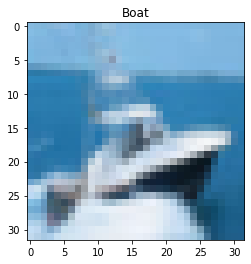

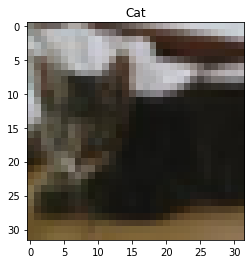

In [3]:
# Loop through each picture in the data set
for i in range(10):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()


In [4]:
!pip install keras


In [5]:
from tensorflow.keras import utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [9]:
# Create a model and add layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [10]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/30
1563/1563 [==============================] - 50s 14ms/step - loss: 1.5099 - accuracy: 0.4497 - val_loss: 1.1615 - val_accuracy: 0.5878
Epoch 2/30
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1321 - accuracy: 0.5983 - val_loss: 1.0053 - val_accuracy: 0.6471
Epoch 3/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9799 - accuracy: 0.6550 - val_loss: 0.8561 - val_accuracy: 0.7040
Epoch 4/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8890 - accuracy: 0.6870 - val_loss: 0.8219 - val_accuracy: 0.7158
Epoch 5/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8220 - accuracy: 0.7116 - val_loss: 0.7914 - val_accuracy: 0.7278
Epoch 6/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7847 - accuracy: 0.7250 - val_loss: 0.7305 - val_accuracy: 0.7448
Epoch 7/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7448 - accuracy: 0.7403 - val_loss: 0.7114 -

In [11]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("in_image_recognition_model_weights.h5")

In [12]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np


In [13]:
# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [14]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [18]:
# Re-load the model's trained weights
model.load_weights("in_image_recognition_model_weights.h5")

# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("frog.png", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img) / 255

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Frog - Likelihood: 0.888027


In [19]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("cat.png", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img) / 255

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Cat - Likelihood: 0.942928
